# Data obtained from the Google Form survey

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the data, cutting the unnecessary columns and rows

data = pd.read_csv('real_life_ratings.csv')
data = data[:43][:]
data = data.drop('Timestamp', axis=1)
data.head(3)

,Your Name,Whiplash (2014),One Flew Over the Cuckoo's Nest (1975),Inglourious Basterds (2009),The Dark Knight (2008),Get Out (2017),Interstellar (2014),500 Days of Summer (2009),Shutter Island (2010),The Intouchables (2011),...,Suicide Squad (2016),Now You See Me (2013),Forrest Gump (1994),The Hunger Games (2012),The Bourne Identity (2002),Reservoir Dogs (1991),No Country for Old Men (2007),Black Panther (2018),Birdman (or the Unexpected Virtue of Ignorance) (2014),Baby Driver (2017)
0,NaN,I liked it!,I liked it!,I liked it!,I liked it!,I haven't seen it.,I liked it!,I liked it!,I liked it!,I liked it!,...,I haven't seen it.,I didn't like it.,I didn't like it.,I liked it!,I didn't like it.,I liked it!,I liked it!,I haven't seen it.,I liked it!,I haven't seen it.
1,Eduard Mihranyan,I liked it!,I liked it!,I haven't seen it.,I liked it!,I haven't seen it.,I liked it!,I haven't seen it.,I liked it!,I liked it!,...,I didn't like it.,I liked it!,I liked it!,I liked it!,I haven't seen it.,I liked it!,I haven't seen it.,I haven't seen it.,I haven't seen it.,I liked it!
2,Nora,I liked it!,I liked it!,I haven't seen it.,I liked it!,I haven't seen it.,I liked it!,I liked it!,I haven't seen it.,I liked it!,...,I didn't like it.,I haven't seen it.,I liked it!,I liked it!,I haven't seen it.,I haven't seen it.,I liked it!,I didn't like it.,I liked it!,I haven't seen it.


In [3]:
#making numeric equivalents of the three responses, replacing them in the data

rating_numeric = {"I liked it!":2, "I didn't like it.":1, "I haven't seen it.":0}
data.iloc[:,1:] = data.iloc[:,1:].replace(rating_numeric)
data.head(3)

,Your Name,Whiplash (2014),One Flew Over the Cuckoo's Nest (1975),Inglourious Basterds (2009),The Dark Knight (2008),Get Out (2017),Interstellar (2014),500 Days of Summer (2009),Shutter Island (2010),The Intouchables (2011),...,Suicide Squad (2016),Now You See Me (2013),Forrest Gump (1994),The Hunger Games (2012),The Bourne Identity (2002),Reservoir Dogs (1991),No Country for Old Men (2007),Black Panther (2018),Birdman (or the Unexpected Virtue of Ignorance) (2014),Baby Driver (2017)
0,NaN,2,2,2,2,0,2,2,2,2,...,0,1,1,2,1,2,2,0,2,0
1,Eduard Mihranyan,2,2,0,2,0,2,0,2,2,...,1,2,2,2,0,2,0,0,0,2
2,Nora,2,2,0,2,0,2,2,0,2,...,1,0,2,2,0,0,2,1,2,0


In [4]:
#dropping the name column, making the columns from object to numeric

cols = data.columns.drop('Your Name')
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 21 columns):
Your Name                                                 37 non-null object
Whiplash (2014)                                           43 non-null int64
One Flew Over the Cuckoo's Nest (1975)                    43 non-null int64
Inglourious Basterds (2009)                               43 non-null int64
The Dark Knight (2008)                                    43 non-null int64
Get Out (2017)                                            43 non-null int64
Interstellar (2014)                                       43 non-null int64
500 Days of Summer (2009)                                 43 non-null int64
Shutter Island (2010)                                     43 non-null int64
The Intouchables (2011)                                   43 non-null int64
127 Hours (2010)                                          43 non-null int64
Suicide Squad (2016)                                      43

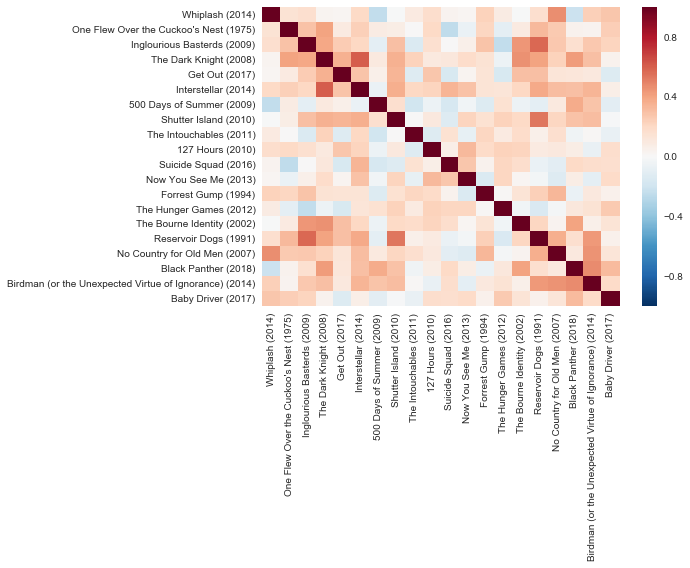

In [5]:
#drawing the correlation heatmap

sns.heatmap(data.corr())
plt.show()

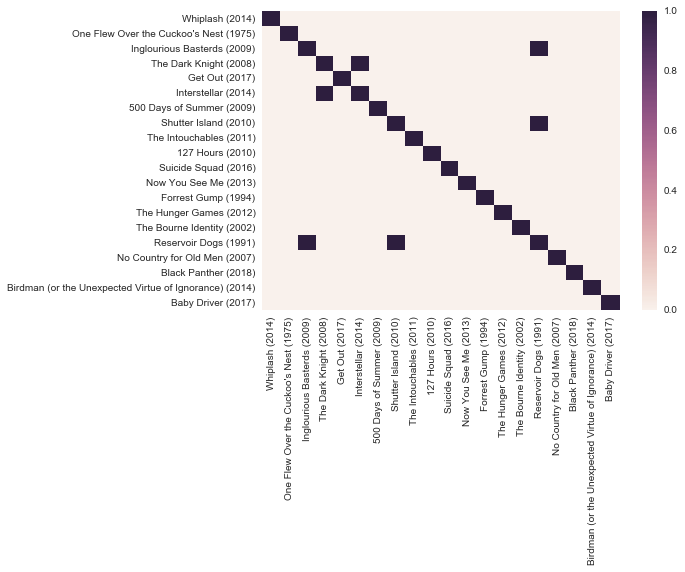

In [6]:
#checking which movies have correlation bigger than 0.5
##worth noting that one pair contains both Quentin Tarantino movies, while the other contains both Christopher Nolan movies

sns.heatmap(data.corr()>0.5)
plt.show()

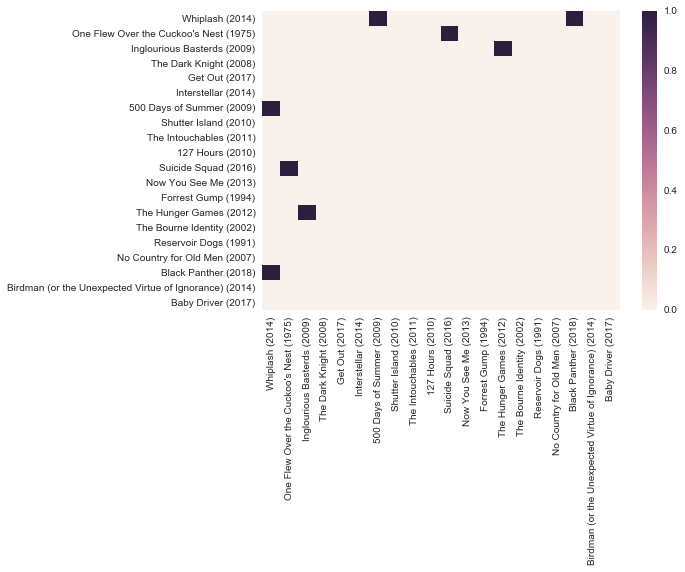

In [7]:
#checking which movies have correlation worse than -0.2

sns.heatmap(data.corr()<-0.2)
plt.show()

In [10]:
#defining the similarity function

def similarity(i, j):
    rated_movies=[] #We store the users who rated both i and j movies
    for u in range(len(i)):
        if i[u]!=0 and j[u]!=0:
            rated_movies.append(u)
    
    if len(rated_movies)==0:
        return 0
    Ri = i[rated_movies]
    Rj = j[rated_movies]
    Ri_mean = np.mean(Ri)
    Rj_mean = np.mean(Rj)
    Ri -= Ri_mean
    Rj -= Rj_mean
    
    sim = (Ri.T.dot(Rj))/((np.linalg.norm(Ri))*(np.linalg.norm(Rj)))
    
    return sim

In [11]:
#making the numeric data

data_num = data.drop('Your Name', axis=1)
data_num.head(3)

,Whiplash (2014),One Flew Over the Cuckoo's Nest (1975),Inglourious Basterds (2009),The Dark Knight (2008),Get Out (2017),Interstellar (2014),500 Days of Summer (2009),Shutter Island (2010),The Intouchables (2011),127 Hours (2010),Suicide Squad (2016),Now You See Me (2013),Forrest Gump (1994),The Hunger Games (2012),The Bourne Identity (2002),Reservoir Dogs (1991),No Country for Old Men (2007),Black Panther (2018),Birdman (or the Unexpected Virtue of Ignorance) (2014),Baby Driver (2017)
0,2,2,2,2,0,2,2,2,2,0,0,1,1,2,1,2,2,0,2,0
1,2,2,0,2,0,2,0,2,2,2,1,2,2,2,0,2,0,0,0,2
2,2,2,0,2,0,2,2,0,2,0,1,0,2,2,0,0,2,1,2,0


In [12]:
#creating the item based similarity matrix

sim_mat_mov=np.empty((data_num.shape[1],data_num.shape[1]))
for i in range(data_num.shape[1]):
    sim_mat_mov[i,i]=1
    for j in range(i+1,data_num.shape[1]):
        sim=similarity(data_num.iloc[:,i], data_num.iloc[:,j])
        sim_mat_mov[i,j]=sim
        sim_mat_mov[j,i]=sim

C:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


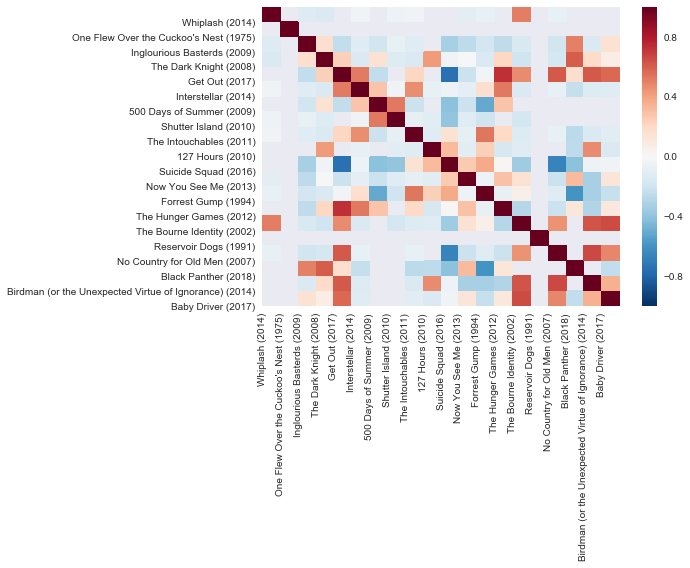

In [13]:
#plotting the item based similarity heatmap

l= list(data_num.columns)
type(l)
sns.heatmap(sim_mat_mov)
plt.xticks(range(len(data_num.columns)), l, rotation=90)
plt.yticks(range(len(data_num.columns)), reversed(l), rotation=0)
plt.show()

In [15]:
sim_mat_user=np.empty((data_num.shape[0],data_num.shape[0]))
for i in range(data_num.shape[0]):
    sim_mat_user[i,i]=1
    for j in range(i+1,data_num.shape[0]):
        sim=similarity(data_num.iloc[i,:], data_num.iloc[j,:])
        sim_mat_user[i,j]=sim
        sim_mat_user[j,i]=sim

C:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


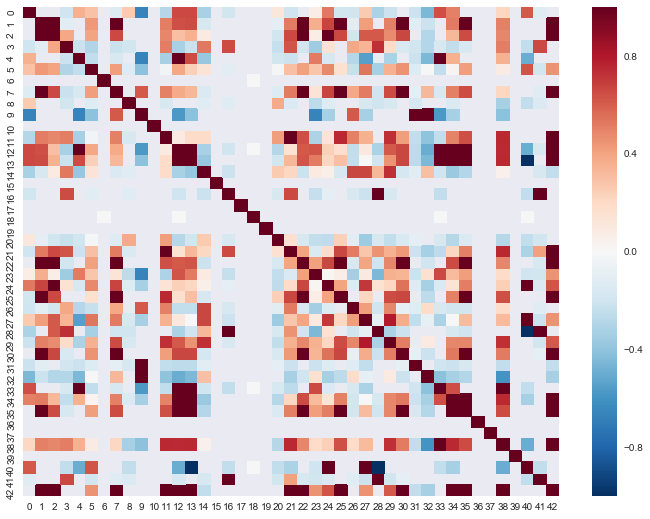

In [16]:
plt.figure(figsize=(12, 9))
sns.heatmap(sim_mat_user)
plt.show()